<a href="https://colab.research.google.com/github/jeremyscodes/DeltaML/blob/main/Yolo11_segmentation_roboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLO11 Instance Segmentation on a Custom Dataset

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

YOLO11 builds on the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from `2.6M` to `56.9M` parameters, and capable of achieving from `39.5` to `54.7` mAP on the COCO dataset.

## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Mon Nov 25 18:14:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [3]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


### SDK

**NOTE:** YOLO's Python interface allows for seamless integration into your Python projects, making it easy to load, run, and process the model's output.

In [ ]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11l-seg.pt')
image = Image.open(requests.get('https://media.roboflow.com/notebooks/examples/dog.jpeg', stream=True).raw)
result = model.predict(image, conf=0.25)[0]


0: 640x384 1 person, 1 car, 1 dog, 1 backpack, 40.6ms
Speed: 1.9ms preprocess, 40.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)


**NOTE:** The obtained `result` object stores information about the location, classes, and confidence levels of the detected objects.

In [ ]:
result.boxes.xyxy

tensor([[0.0000e+00, 6.6552e+02, 4.4326e+02, 1.2796e+03],
        [7.1101e+01, 2.4920e+02, 6.4366e+02, 9.1943e+02],
        [1.1703e+00, 3.5331e+02, 6.2878e+02, 1.2769e+03],
        [6.2872e+02, 7.3547e+02, 6.9789e+02, 7.8725e+02]], device='cuda:0')

In [ ]:
result.boxes.conf

tensor([0.9365, 0.9156, 0.8151, 0.7367], device='cuda:0')

In [ ]:
result.boxes.cls

tensor([24., 16.,  0.,  2.], device='cuda:0')

In [ ]:
result.masks.data

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

**NOTE:** YOLO11 can be easily integrated with `supervision` using the familiar `from_ultralytics` connector.

In [ ]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

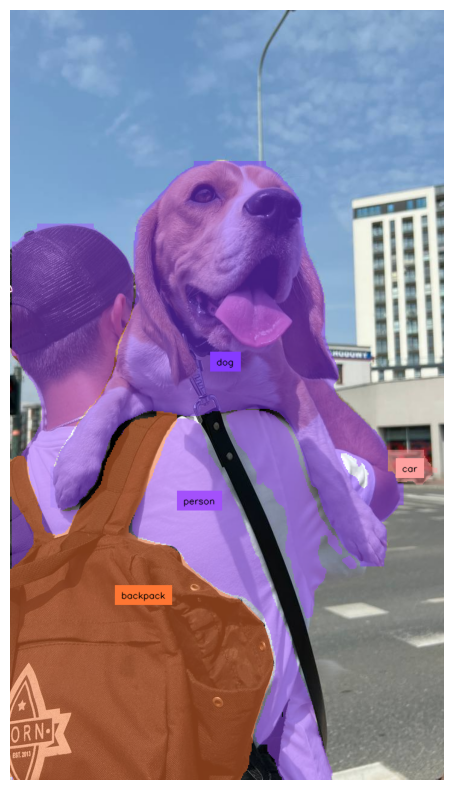

In [ ]:
mask_annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK, text_position=sv.Position.CENTER)

annotated_image = image.copy()
annotated_image = mask_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/ks-fsm9o/pelvis-ap-x-ray) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

workspace = rf.workspace("ks-fsm9o")
project = rf.workspace("firstworkspace-0ti40").project("pattysegment")
version = project.version(1)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PattySegment-1 in yolov11:: 100%|██████████| 258/258 [00:00<00:00, 6805.12it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 19.7M/19.7M [00:00<00:00, 106MB/s] 
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/content/datasets/PattySegment-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=F

## Save model to Google Drive

In [ ]:
from ultralytics import YOLO
model = YOLO(f'{HOME}/runs/segment/train/weights/best.pt')
save_path = '/content/drive/MyDrive/yolo11s-seg_patty.pt'
model.save(save_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/segment/train/weights/best.pt'

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					     labels_correlogram.jpg  train_batch0.jpg
BoxF1_curve.png					     labels.jpg		     train_batch1.jpg
BoxP_curve.png					     MaskF1_curve.png	     train_batch2.jpg
BoxPR_curve.png					     MaskP_curve.png	     val_batch0_labels.jpg
BoxR_curve.png					     MaskPR_curve.png	     val_batch0_pred.jpg
confusion_matrix_normalized.png			     MaskR_curve.png	     weights
confusion_matrix.png				     results.csv
events.out.tfevents.1731785055.aa363acfe972.10180.0  results.png


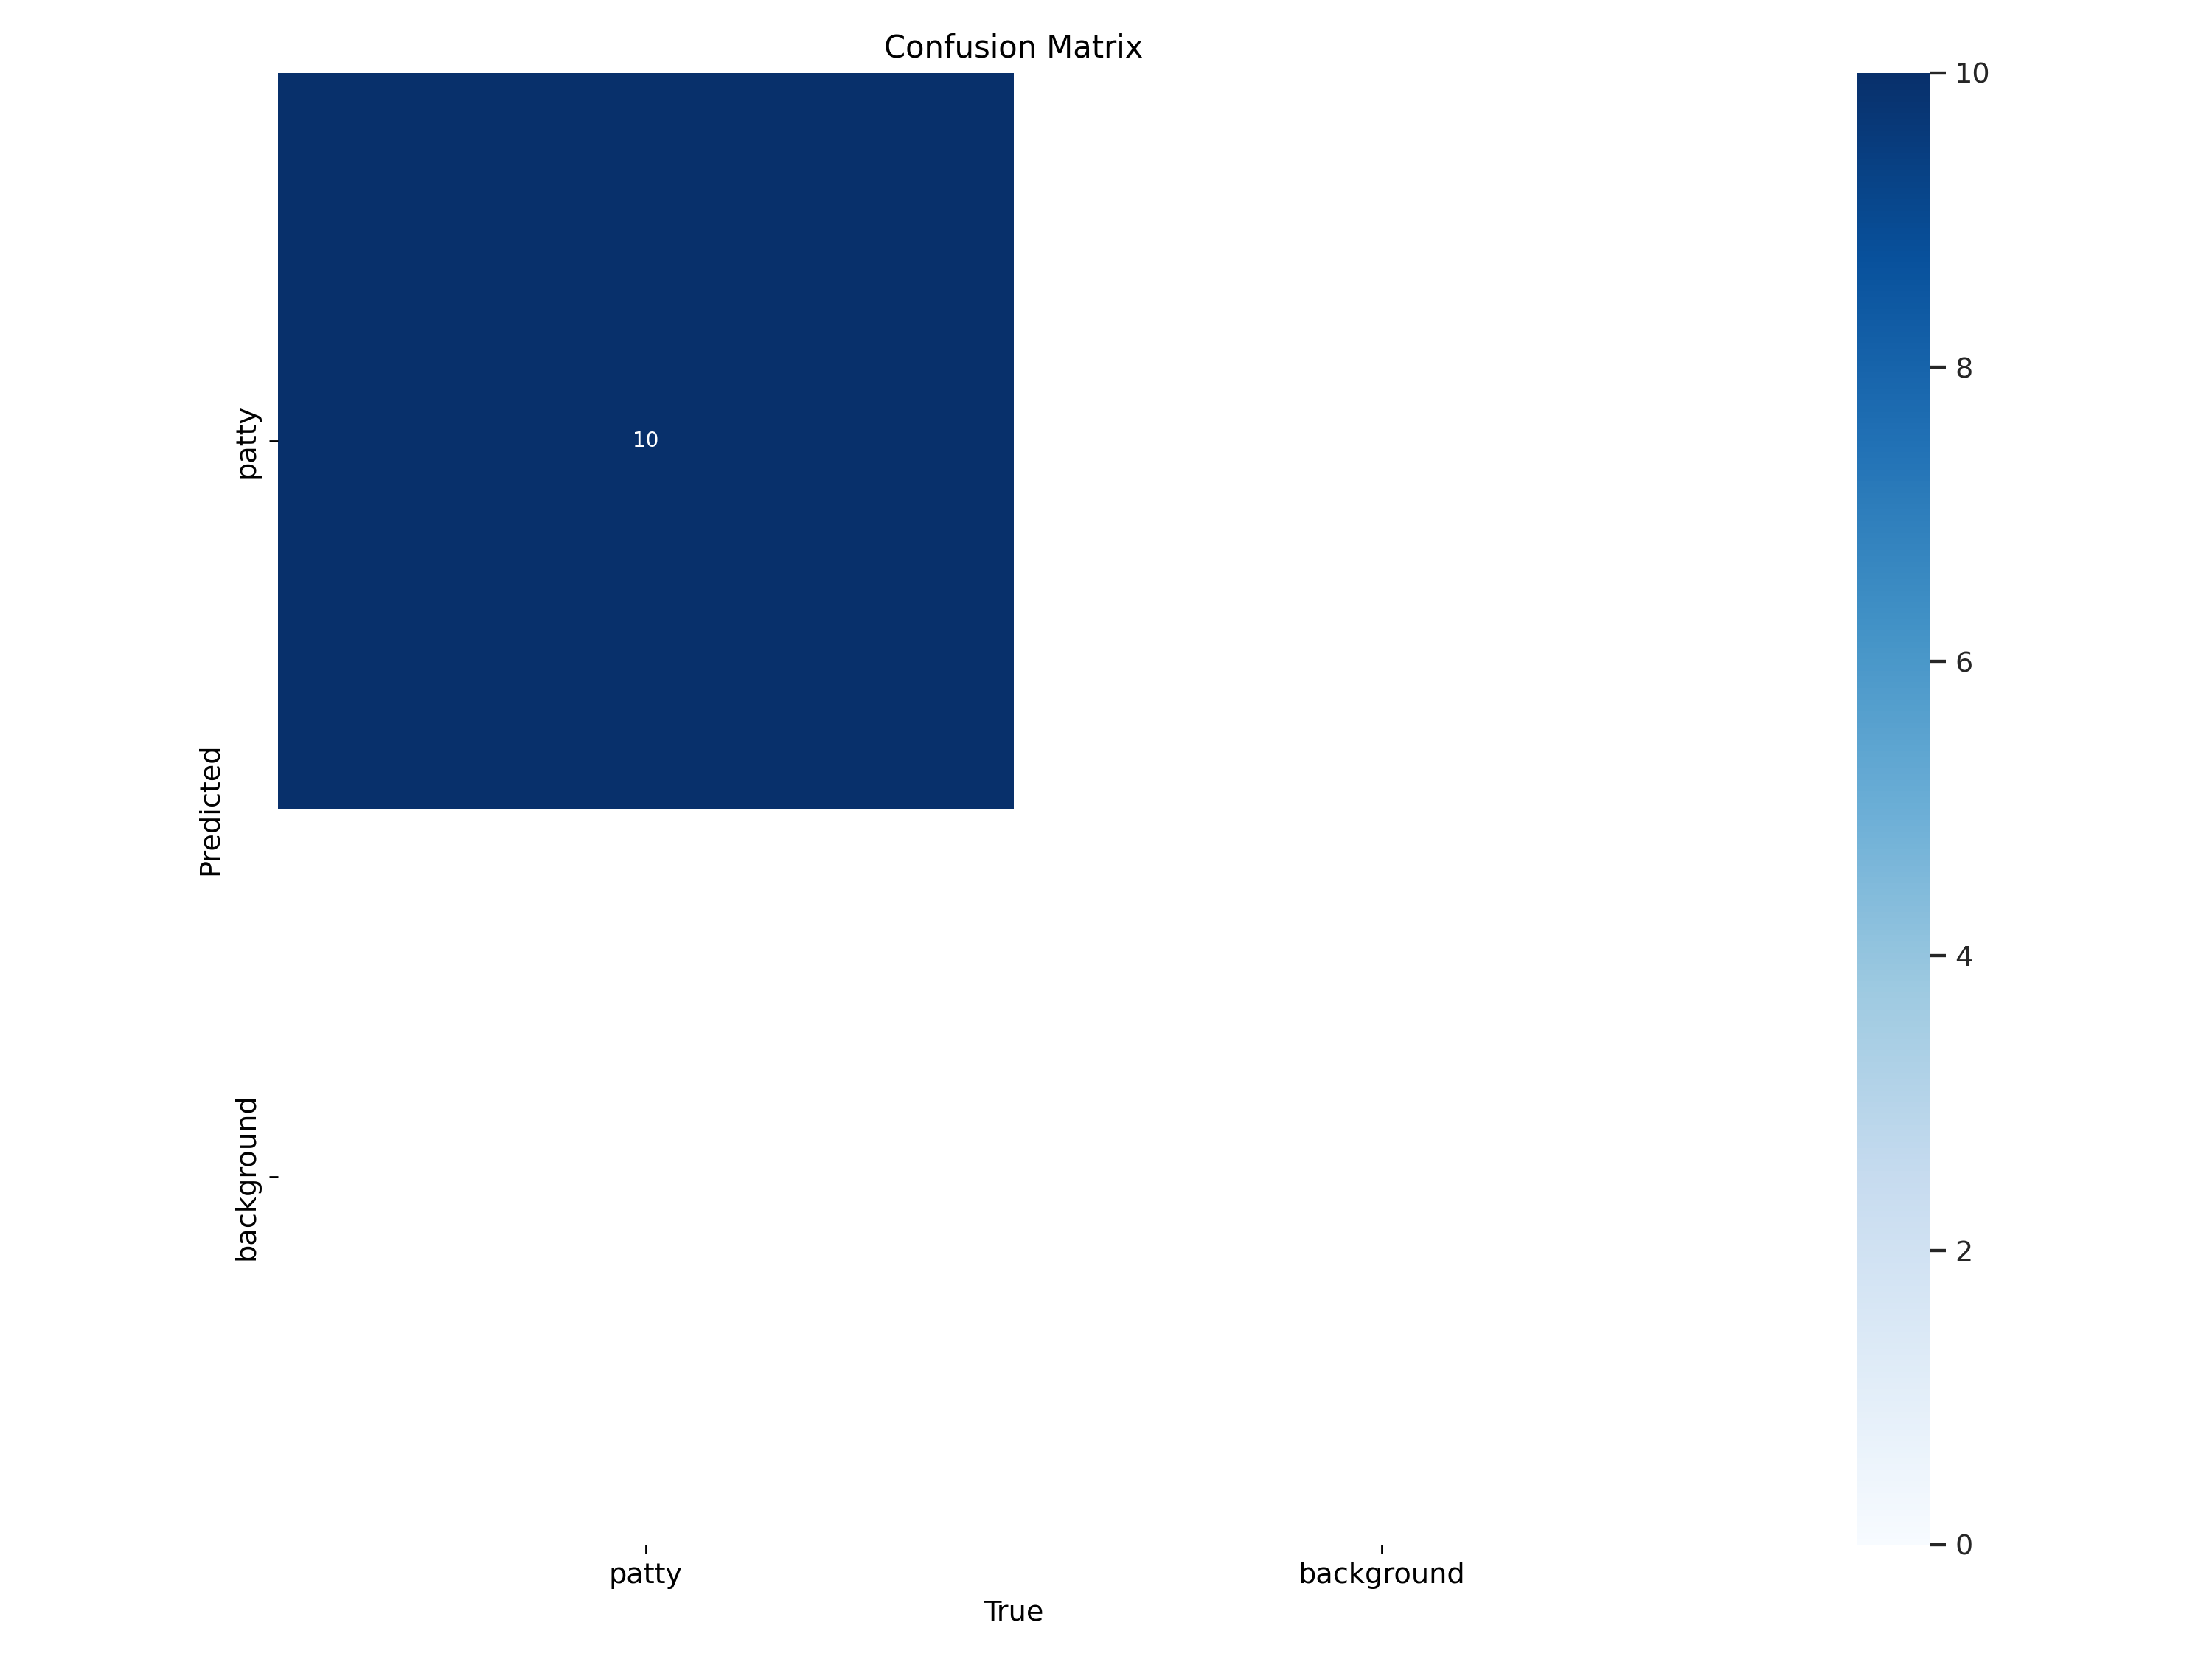

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

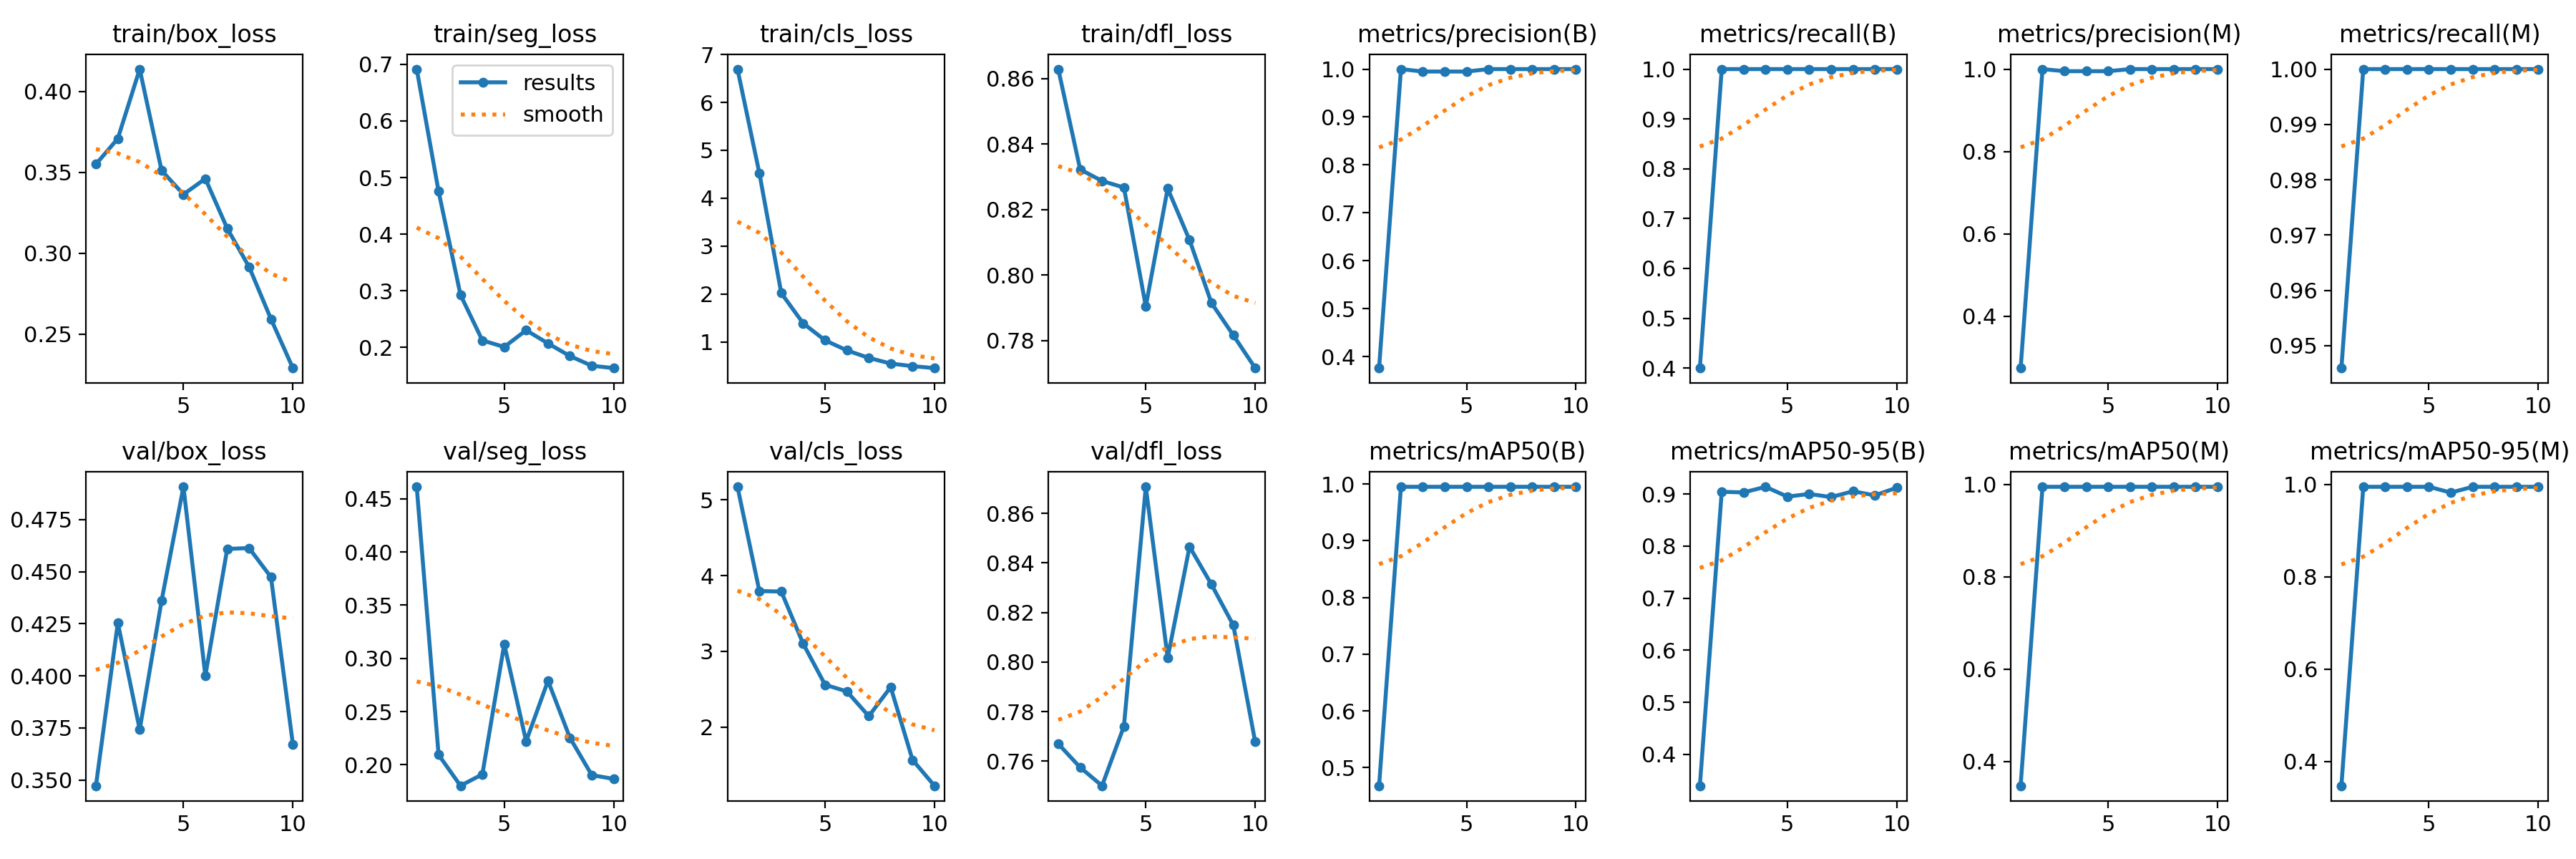

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/results.png', width=600)

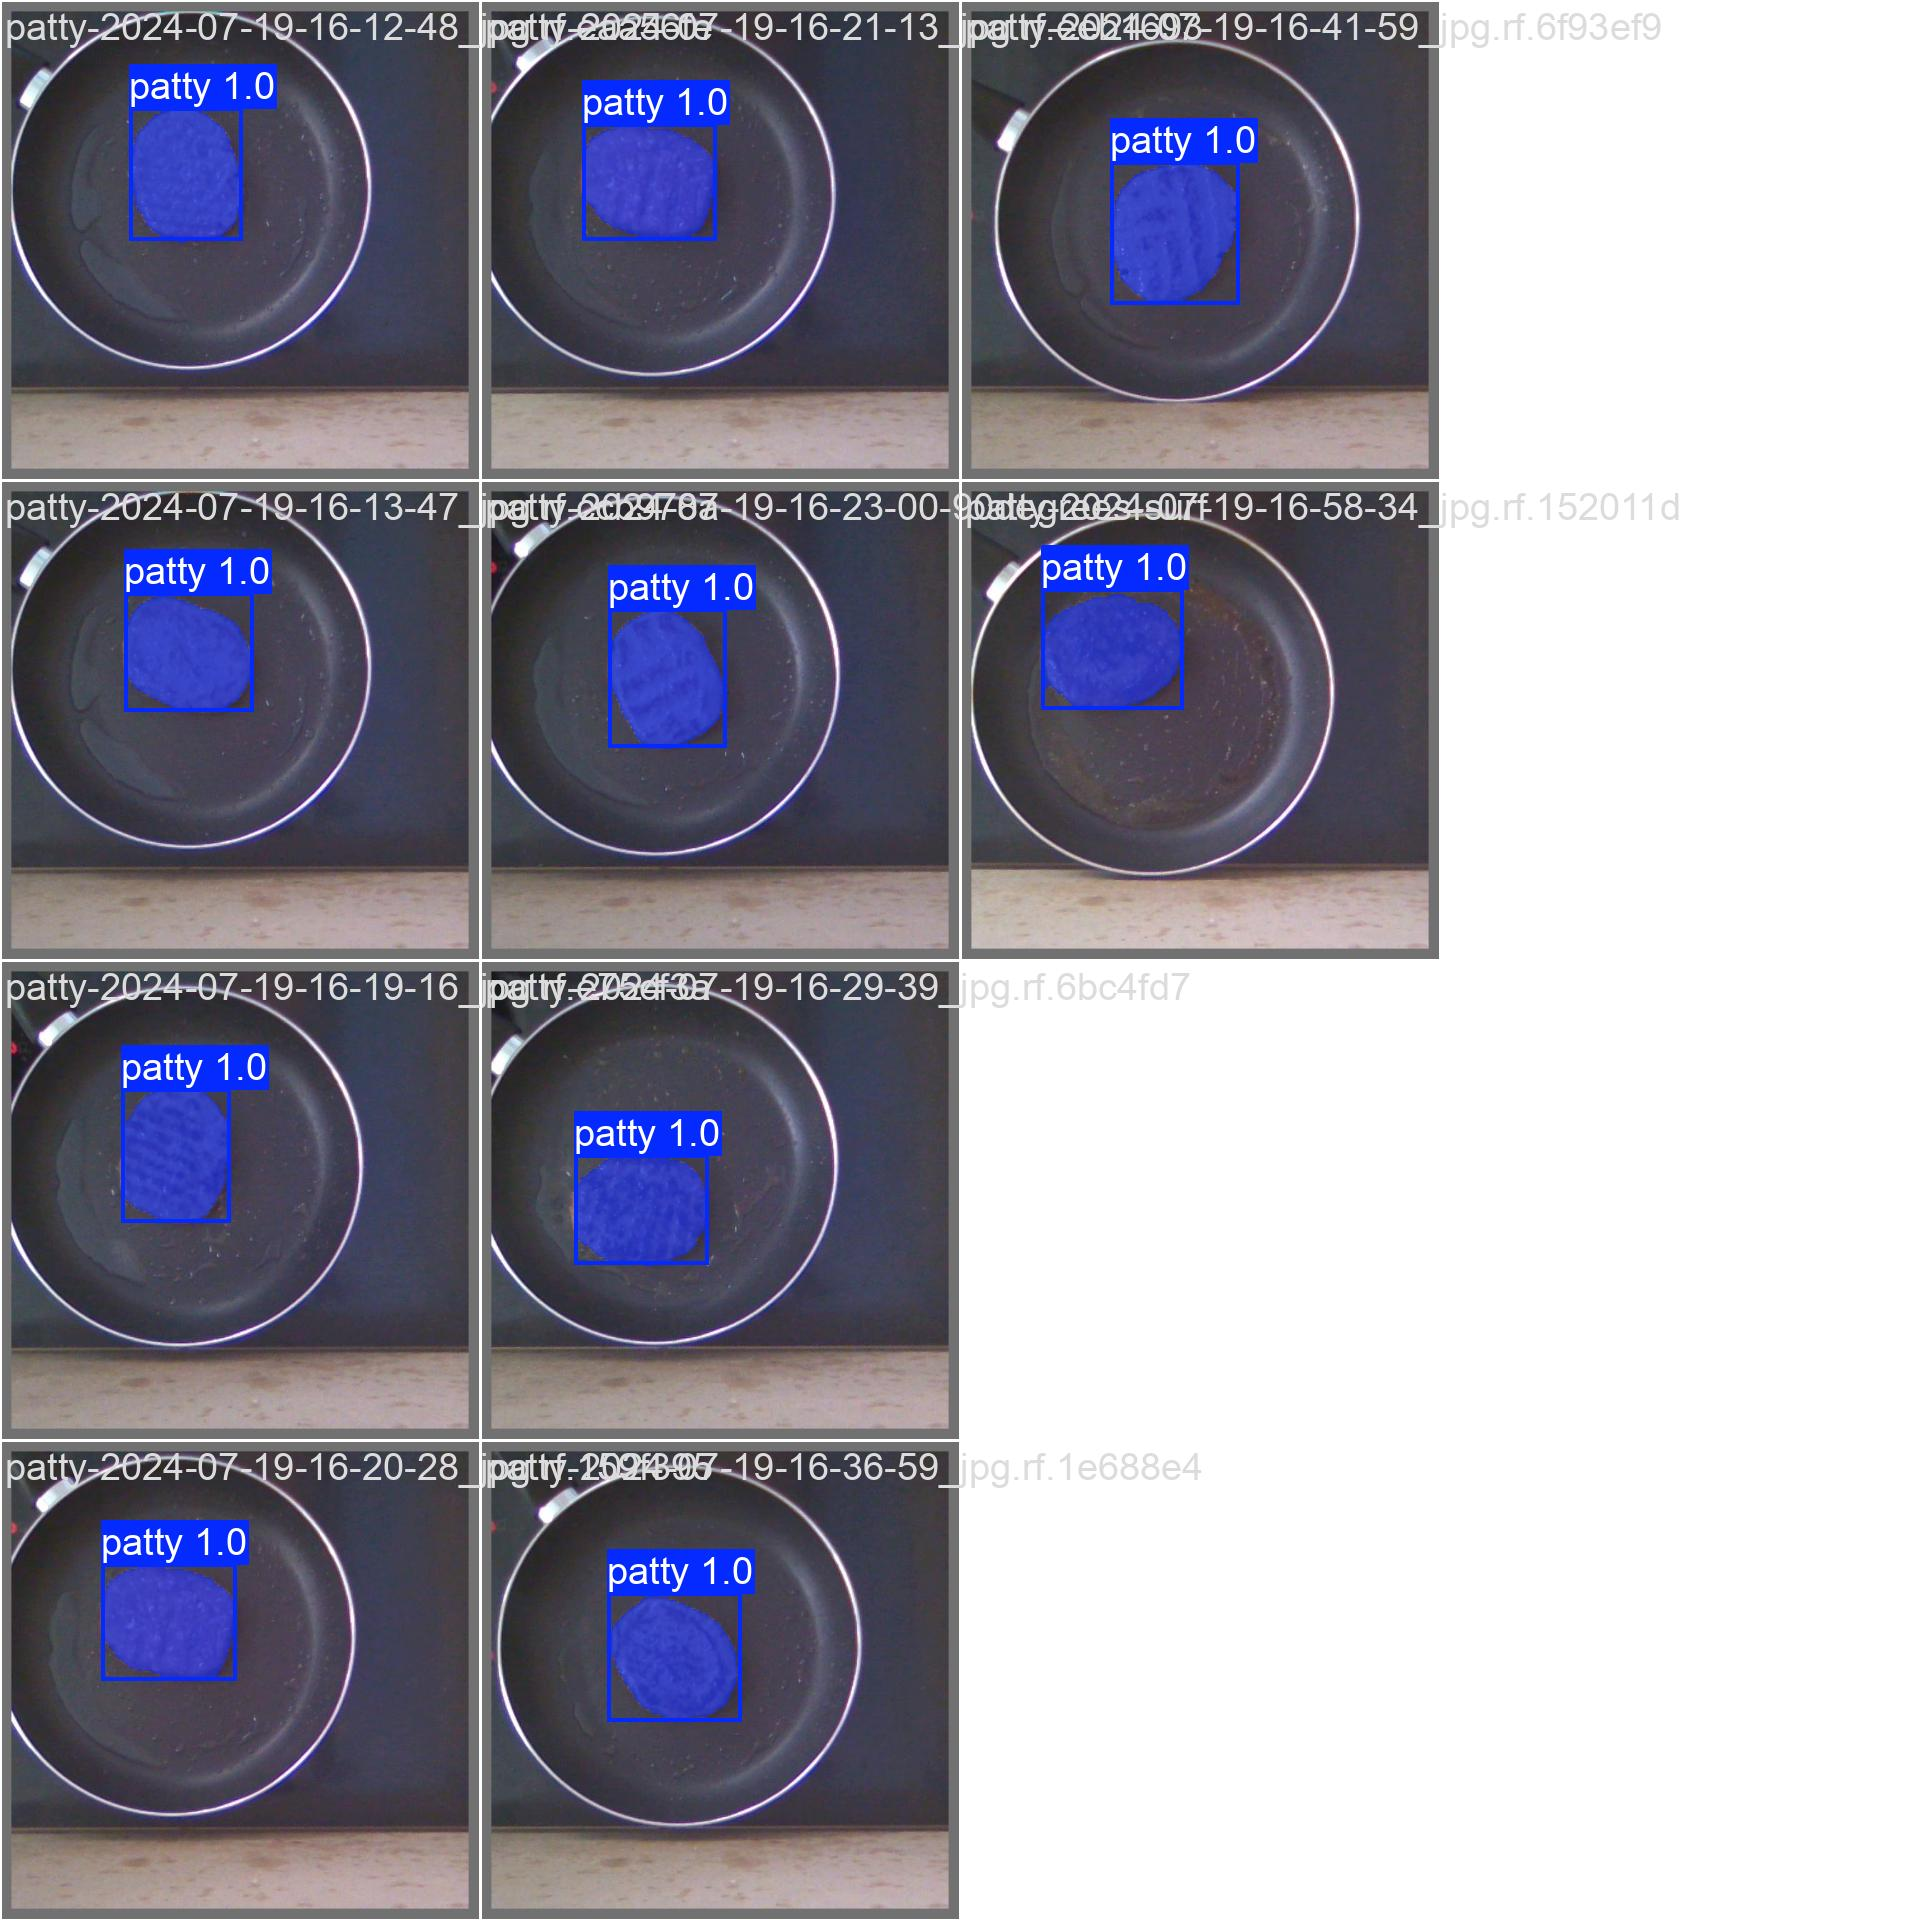

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs
val: Scanning /content/datasets/PattySegment-1/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.38s/it]
                   all         10         10      0.995          1      0.995      0.914      0.995          1      0.995      0.995
Speed: 0.2ms preprocess, 19.9ms inference, 0.0ms loss, 94.9ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source=/content/my_test_images/Screenshot_multiple_patties.png save=True

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs

image 1/1 /content/my_test_images/Screenshot_multiple_patties.png: 640x288 14 pattys, 58.0ms
Speed: 2.1ms preprocess, 58.0ms inference, 611.9ms postprocess per image at shape (1, 3, 640, 288)
Results saved to runs/segment/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


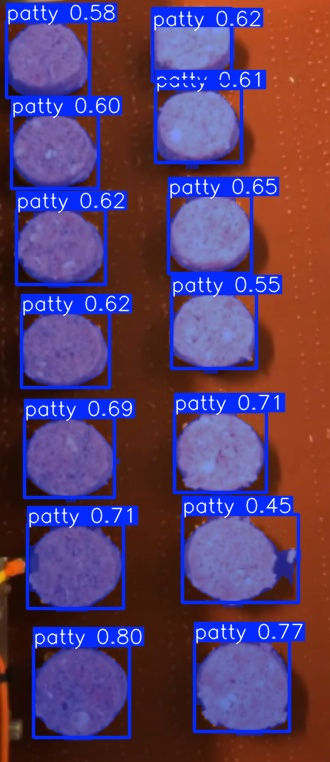

In [ ]:
IPyImage(filename=f'{HOME}/runs/segment/predict2/Screenshot_multiple_patties.jpg', width=600)

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source=/content/datasets/videos/3390687633-preview.mp4 save=True

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs

video 1/1 (frame 1/301) /content/datasets/videos/3390687633-preview.mp4: 384x640 (no detections), 54.2ms
video 1/1 (frame 2/301) /content/datasets/videos/3390687633-preview.mp4: 384x640 (no detections), 13.6ms
video 1/1 (frame 3/301) /content/datasets/videos/3390687633-preview.mp4: 384x640 (no detections), 13.6ms
video 1/1 (frame 4/301) /content/datasets/videos/3390687633-preview.mp4: 384x640 (no detections), 13.5ms
video 1/1 (frame 5/301) /content/datasets/videos/3390687633-preview.mp4: 384x640 (no detections), 13.5ms
video 1/1 (frame 6/301) /content/datasets/videos/3390687633-preview.mp4: 384x640 (no detections), 13.6ms
video 1/1 (frame 7/301) /content/datasets/videos/33906876

In [ ]:
!ffmpeg -i /content/runs/segment/predict4/3390687633-preview.avi /content/runs/segment/predict4/video.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

## Load model from gogle drive

In [4]:
from ultralytics import YOLO
from PIL import Image
import requests
from google.colab import drive
drive.mount('/content/drive')
loaded_model = YOLO('/content/drive/MyDrive/yolo11s-seg_patty.pt')

Mounted at /content/drive


In [ ]:
!yolo task=detect mode=predict model='/content/drive/My Drive/yolo11s.pt' conf=0.25 source='/content/my_test_images/Screenshot_multiple_patties.png' save=True


WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.33 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 969, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 554, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 184, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/li

In [ ]:
IPyImage(filename=f'{HOME}/runs/segment/predict7/Screenshot_multiple_patties.jpg', width=600)

NameError: name 'IPyImage' is not defined

In [ ]:
!yolo task=detect mode=predict model='/content/drive/MyDrive/yolo11s-seg_patty.pt' conf=0.50 source=/content/drive/MyDrive/row_of_4_patties.mp4 save=True

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.33 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs

video 1/1 (frame 1/233) /content/drive/MyDrive/row_of_4_patties.mp4: 384x640 4 pattys, 56.9ms
video 1/1 (frame 2/233) /content/drive/MyDrive/row_of_4_patties.mp4: 384x640 4 pattys, 14.2ms
video 1/1 (frame 3/233) /content/drive/MyDrive/row_of_4_patties.mp4: 384x640 4 pattys, 17.0ms
video 1/1 (frame 4/233) /content/drive/MyDrive/row_of_4_patties.mp4: 384x640 4 pattys, 18.1ms
video 1/1 (frame 5/233) /content/drive/MyDrive/row_of_4_patties.mp4: 384x640 4 pattys, 14.1ms
video 1/1 (frame 6/233) /content/drive/MyDrive/row_of_4_patties.mp4: 384x640 4 pattys, 21.4ms
video 1/1 (frame 7/233) /content/drive/MyDrive/row_of_4_patties.mp4: 384x640 4 pattys, 20.0ms
video 1/1 (frame 8/233) /cont

# Object Tracking

In [5]:
!pip install supervision[assets]==0.24.0

from IPython import display
display.clear_output()

import supervision as sv
print("supervision.__version__:", sv.__version__)

supervision.__version__: 0.24.0


In [6]:
from supervision.assets import download_assets, VideoAssets

# SOURCE_VIDEO_PATH = download_assets(VideoAssets.VEHICLES)
SOURCE_VIDEO_PATH = '/content/drive/MyDrive/row_of_4_patties.mp4'

In [7]:
# dict maping class_id to class_name
CLASS_NAMES_DICT = loaded_model.model.names

# the class names we have chosen
SELECTED_CLASS_NAMES = ['patty']

# class ids matching the class names we have chosen
SELECTED_CLASS_IDS = [
    {value: key for key, value in CLASS_NAMES_DICT.items()}[class_name]
    for class_name
    in SELECTED_CLASS_NAMES
]

In [8]:
import supervision as sv
import numpy as np


In [9]:
# create frame generator
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator and LabelAnnotator
box_annotator = sv.BoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=2, text_scale=1.5, text_color=sv.Color.BLACK)
mask_annotator = sv.MaskAnnotator()
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = loaded_model(frame, verbose=False)[0]

# convert to Detections
detections = sv.Detections.from_ultralytics(results)
# only consider class id from selected_classes define above
detections = detections[np.isin(detections.class_id, SELECTED_CLASS_IDS)]

# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for confidence, class_id in zip(detections.confidence, detections.class_id)
]

# annotate and display frame
annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame, detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame, detections=detections, labels=labels)

#new
annotated_frame = mask_annotator.annotate(annotated_frame, detections=detections)

Pixel_to_cm = 25                       #xx pixels are 1cm (assumption, needs to be calibrated in real time)
Pixel_to_square_cm = 25*25
H, W, _ = annotated_frame.shape


for result in results:
    print("result", result)
    # a result contains {boxes, keypoints, masks, names, obb, orig_img, orig_shape, path, probs, save_dir, speed(preprocess, inference,postprocess)}
    for j, mask in enumerate(result.masks.data):
        mask = mask.cpu().numpy()
        mask_output = mask *255

        mask = cv2.resize(mask, (W, H))

        area = np.sum(mask)
        print(f"Object {j} area (in pixels): {area}")

        total_area_cm = round(area / Pixel_to_square_cm, 0)
        print(f"Object area (in cm2): {total_area_cm}")

        cv2.imwrite(f"./mask_output_{j}.png", mask_output)

# sv.plot_image(annotated_frame, size=(10, 10))

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

KeyboardInterrupt: 

## Predict and annotate whole video

In [32]:
# settings
LINE_START = sv.Point(50, 600)
LINE_END = sv.Point(1920 - 50, 600)

TARGET_VIDEO_PATH = f"{HOME}/result.mp4"

In [11]:
sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=1920, height=1080, fps=30, total_frames=233)

In [23]:
# Adjusted LabelAnnotator with smaller text size
label_annotator = sv.LabelAnnotator(
    text_thickness=1,    # Reduced text thickness
    text_scale=0.8,      # Reduced text scale for smaller text
    text_color=sv.Color.BLACK,
)

In [13]:
from re import L
import cv2
# create BYTETracker instance
byte_tracker = sv.ByteTrack(
    track_activation_threshold=0.25,
    lost_track_buffer=30,
    minimum_matching_threshold=0.7,
    frame_rate=30,
    minimum_consecutive_frames=3)

byte_tracker.reset()

# create VideoInfo instance
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# create frame generator
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# create LineZone instance, it is previously called LineCounter class
line_zone = sv.LineZone(start=LINE_START, end=LINE_END)

# create instance of BoxAnnotator, LabelAnnotator, and TraceAnnotator
box_annotator = sv.BoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=2, text_scale=1.5, text_color=sv.Color.BLACK)
trace_annotator = sv.TraceAnnotator(thickness=4, trace_length=50)
mask_annotator = sv.MaskAnnotator()

# create LineZoneAnnotator instance, it is previously called LineCounterAnnotator class
line_zone_annotator = sv.LineZoneAnnotator(thickness=4, text_thickness=4, text_scale=2)

# Maintain a set of IDs for objects whose area has been calculated
previous_counted_ids  = set()

# define call back function to be used in video processing

def callback(frame: np.ndarray, index: int) -> np.ndarray:
    global previous_counted_ids

    # model prediction on single frame and conversion to supervision Detections
    conf=0.5
    results = loaded_model(frame, verbose=False, conf=conf)[0]
    detections = sv.Detections.from_ultralytics(results)
    # only consider class id from selected_classes define above
    detections = detections[np.isin(detections.class_id, SELECTED_CLASS_IDS)]

    # tracking detections
    detections = byte_tracker.update_with_detections(detections)
    labels = [
        f"#{tracker_id} {loaded_model.model.names[class_id]} {confidence:0.2f}"
        for confidence, class_id, tracker_id,
        in zip(detections.confidence, detections.class_id, detections.tracker_id)
    ]
    annotated_frame = frame.copy()
    annotated_frame = trace_annotator.annotate(
        scene=annotated_frame, detections=detections)
    annotated_frame = box_annotator.annotate(
        scene=annotated_frame, detections=detections)
    annotated_frame = label_annotator.annotate(
        scene=annotated_frame, detections=detections, labels=labels)

    annotated_frame = mask_annotator.annotate(annotated_frame, detections=detections)

    # update line counter
    line_zone.trigger(detections)

    Pixel_to_cm = 25                       #xx pixels are 1cm (assumption, needs to be calibrated in real time)
    Pixel_to_square_cm = 25*25
    H, W, _ = annotated_frame.shape

    # Identify new objects that have just crossed the line
    new_counted_ids = line_zone.counted_objects_ids - previous_counted_ids


    #if object past LINE and not processed
      #then calcualte area^2

    if detections.mask is not None:
        for new_id in new_counted_ids:
            indices = np.where(detections.tracker_id == new_id)[0]
            if len(indices) > 0:
                idx = indices[0]
                mask = detections.mask[idx]
                mask = cv2.resize(mask.astype(np.uint8), (W, H))

                area = np.sum(mask)
                print(f"Object {new_id} area (in pixels): {area}")
                total_area_cm = round(area / Pixel_to_square_cm, 0)
                print(f"Object area (in cm²): {total_area_cm}")
            else:
                print(f"No detection found for tracker_id {new_id}")
    else:
        print("Detections do not contain masks.")

    # Update the set of processed IDs
    previous_counted_ids  = line_zone.counted_objects_ids.copy()


    # return frame with box and line annotated result
    return line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)

# process the whole video
sv.process_video(
    source_path = SOURCE_VIDEO_PATH,
    target_path = TARGET_VIDEO_PATH,
    callback=callback
)

AttributeError: 'LineZone' object has no attribute 'counted_objects_ids'

In [26]:

# Function to draw multi-line text with background
def draw_label_with_background(image, text, position, font_scale, thickness, text_color, bg_color):
    """
    Draws multi-line text on an image with a background rectangle.

    :param image: The image to draw on.
    :param text: The text to draw, with lines separated by '\n'.
    :param position: Bottom-left corner of the text string in the image.
    :param font_scale: Font scale factor.
    :param thickness: Thickness of the text strokes.
    :param text_color: Color of the text.
    :param bg_color: Background color for the rectangle.
    """
    font = cv2.FONT_HERSHEY_SIMPLEX
    lines = text.split('\n')
    x, y = position
    x = int(max(x, 0))
    y = int(max(y, 0))
    # Calculate the size of the background rectangle
    text_sizes = [cv2.getTextSize(line, font, font_scale, thickness)[0] for line in lines]
    line_height = max([size[1] for size in text_sizes]) + 5  # Add some padding
    total_height = line_height * len(lines)
    text_width = max([size[0] for size in text_sizes])
    # Draw background rectangle
    cv2.rectangle(image, (x, y), (x + text_width + 4, y + total_height + 4), bg_color, cv2.FILLED)
    # Draw each line of text
    for i, line in enumerate(lines):
        y_offset = y + line_height * (i + 1)
        cv2.putText(image, line, (x + 2, y_offset), font, font_scale, text_color, thickness)

In [33]:
# create BYTETracker instance
byte_tracker = sv.ByteTrack(
    track_activation_threshold=0.25,
    lost_track_buffer=30,
    minimum_matching_threshold=0.7,
    frame_rate=30,
    minimum_consecutive_frames=3)

byte_tracker.reset()

# Before processing the video, create a new LineZone instance
line_zone = sv.LineZone(start=LINE_START, end=LINE_END)

# Global variables to maintain state
object_positions = {}  # Stores previous positions of objects
crossed_ids = set()    # Stores IDs of objects that have crossed the line
areas = {}             # Stores the calculated area for each tracker_id

def callback(frame: np.ndarray, index: int) -> np.ndarray:
    global object_positions, crossed_ids, areas

    # Model prediction and conversion to Supervision Detections
    conf = 0.5
    results = loaded_model(frame, verbose=False, conf=conf)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = detections[np.isin(detections.class_id, SELECTED_CLASS_IDS)]

    # Tracking detections
    detections = byte_tracker.update_with_detections(detections)

    # Update line zone
    line_zone.trigger(detections)

    Pixel_to_cm = 25  # xx pixels are 1cm (assumption, needs to be calibrated in real time)
    Pixel_to_square_cm = 25 * 25
    H, W, _ = frame.shape

    # For each detection, check if it has crossed the line
    num_detections = len(detections.xyxy)
    for i in range(num_detections):
        tracker_id = detections.tracker_id[i]
        if tracker_id is None:
            continue  # Skip detections without a tracker ID

        # Get the centroid of the bounding box
        x1, y1, x2, y2 = detections.xyxy[i]
        current_position = ((x1 + x2) / 2, (y1 + y2) / 2)

        # If we have a previous position for this object, check if it crossed the line
        if tracker_id in object_positions:
            previous_position = object_positions[tracker_id]

            # Check if the object has crossed the line
            crossed = check_line_crossing(previous_position, current_position, LINE_START, LINE_END)

            if crossed and tracker_id not in crossed_ids:
                crossed_ids.add(tracker_id)

                # Calculate the area using the mask
                if detections.mask is not None and detections.mask[i] is not None:
                    mask = detections.mask[i]
                    mask = cv2.resize(mask.astype(np.uint8), (W, H))

                    area = np.sum(mask)
                    total_area_cm = round(area / Pixel_to_square_cm, 0)
                    areas[tracker_id] = total_area_cm  # Store the area associated with the tracker_id

                    print(f"Object {tracker_id} area (in pixels): {area}")
                    print(f"Object area (in cm²): {total_area_cm}")
                else:
                    print(f"No mask available for object {tracker_id}")
        # Update the position of the object
        object_positions[tracker_id] = current_position

    # Prepare labels with area information if available
    labels = []
    for i in range(num_detections):
        confidence = detections.confidence[i]
        class_id = detections.class_id[i]
        tracker_id = detections.tracker_id[i]
        label = f"#{tracker_id} {loaded_model.model.names[class_id]} {confidence:0.2f}"
        if tracker_id in areas:
            label += f"\nArea: {areas[tracker_id]} cm^2"
        labels.append(label)

    # Annotate the frame
    annotated_frame = frame.copy()
    annotated_frame = trace_annotator.annotate(
        scene=annotated_frame, detections=detections)
    annotated_frame = box_annotator.annotate(
        scene=annotated_frame, detections=detections)

    # Draw labels with background
    for i in range(num_detections):
        bbox = detections.xyxy[i]
        x1, y1, x2, y2 = bbox
        label = labels[i]
        # Position the label above the bounding box
        position = (int(x1), int(y1) - 5)  # Adjust -5 as needed
        # Draw the label with background
        draw_label_with_background(
            image=annotated_frame,
            text=label,
            position=position,
            font_scale=0.8,
            thickness=1,
            text_color=(0, 0, 0),          # Black text
            bg_color=(255, 255, 255)       # White background
        )

    # annotated_frame = label_annotator.annotate(
    #     scene=annotated_frame, detections=detections, labels=labels)
    annotated_frame = mask_annotator.annotate(annotated_frame, detections=detections)

    # Return the annotated frame
    return line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)

def check_line_crossing(prev_pos, curr_pos, line_start, line_end):
    """
    Check if the line between prev_pos and curr_pos intersects with the line defined by line_start and line_end.
    """
    # Convert positions to NumPy arrays
    p0 = np.array(prev_pos)
    p1 = np.array(curr_pos)
    l0 = np.array([line_start.x, line_start.y])
    l1 = np.array([line_end.x, line_end.y])

    # Line segments
    s1 = p1 - p0
    s2 = l1 - l0

    denom = -s2[0] * s1[1] + s1[0] * s2[1]
    if denom == 0:
        return False  # Lines are parallel

    s = (-s1[1] * (p0[0] - l0[0]) + s1[0] * (p0[1] - l0[1])) / denom
    t = ( s2[0] * (p0[1] - l0[1]) - s2[1] * (p0[0] - l0[0])) / denom

    return (s >= 0 and s <= 1 and t >= 0 and t <= 1)

sv.process_video(
    source_path = SOURCE_VIDEO_PATH,
    target_path = TARGET_VIDEO_PATH,
    callback=callback
)


Object 4 area (in pixels): 67057
Object area (in cm²): 107.0
Object 3 area (in pixels): 66370
Object area (in cm²): 106.0
Object 2 area (in pixels): 67801
Object area (in cm²): 108.0
Object 1 area (in pixels): 68215
Object area (in cm²): 109.0
Object 5 area (in pixels): 68200
Object area (in cm²): 109.0
Object 7 area (in pixels): 66718
Object area (in cm²): 107.0
Object 6 area (in pixels): 68590
Object area (in cm²): 110.0
Object 8 area (in pixels): 65653
Object area (in cm²): 105.0
Object 11 area (in pixels): 66772
Object area (in cm²): 107.0
Object 10 area (in pixels): 67396
Object area (in cm²): 108.0
Object 9 area (in pixels): 68206
Object area (in cm²): 109.0
Object 12 area (in pixels): 66112
Object area (in cm²): 106.0
Object 15 area (in pixels): 67069
Object area (in cm²): 107.0
Object 14 area (in pixels): 67639
Object area (in cm²): 108.0
Object 13 area (in pixels): 67420
Object area (in cm²): 108.0
Object 16 area (in pixels): 66652
Object area (in cm²): 107.0


## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.